# **Laboratorio 12: Funciones de pérdida en el modelo de Regresión Lineal**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2340 Fundamentos del machine learning**

**Nombres de los integrantes**


1.   Laura Julieth Carretero Serrano
2.   Juan David Rios Nisperuza

**Número del grupo**

*3*


# **1. Norma L2 como función de pérdida**

En el laboratorio anterior iniciamos el estudio del modelo de Regresión Lineal como herramienta de modelamiento y filtrado de datos. Para obtener el valor de los coeficientes óptimos $\beta$ que mejor ajustan los datos, tomamos como punto de partida un problema de optimización de mínimos cuadrados entre la predicción y el valor real de la variable independiente:

\begin{align*}
  \min_\beta ||y-H\beta||_2^2
 \end{align*}

 > 1. *Resolver el problema de minimos cuadrados es equivalente a minimizar el cuadrado de la norma $L2$ como función de pérdida.*

Bajo esta elección, el problema puede resolverse de forma analítica y los valores de $\beta$ que minimizan la función de pérdida están dados por la expresión:
\begin{align*}
  \beta^* =  (H^TH)^{-1}H^Ty
\end{align*}

*Es importante aclarar que, por lo general, se utiliza la norma $L2$ como medida de rendimiento (función de pérdida) en problemas de Regresión. Sin embargo, minimizar MSE (el cuadrado de la norma $L2$) permite resolver el problema de forma analítica y conduce al mismo resultado, puesto que minimizar una función implica minimizar también su raíz cuadrada. [1]*

# **2. Norma L1 como función de pérdida**

Existen algunos escenarios en los que utilizar la norma $L2$ como medida de rendimiento no resulta ventajoso. En este laboratorio vamos a explorar dichos escenarios. Una función de pérdida alternativa que suele plantearse en los problemas de Regresión es la norma $L1$ (también conocida como Error Absoluto Medio (MAE en inglés) o norma Manhattan):

\begin{align*}
  \min_\beta ||y-H\beta||_1
 \end{align*}

Bajo esta elección, la minimización de la función de pérdida busca reducir el error entendido como el valor absoluto de la diferencia entre el valor real de la variable independiente $y$ y la predicción del modelo $H\beta$. A diferencia de la optimización basada en mínimos cuadrados, el uso de la norma $L1$ como función de pérdida no permite calcular el valor óptimo de los coeficentes $\beta$ de forma analítica por lo que se hace necesario recurrir a métodos de minimización numérica para estimar su valor, tales como los que proporciona la libreria *optimize* de Python.

# **Ejercicios**

1. Importe los datos X y Y contenidos en el archivo *reg_1.mat*. Recuerde que este formato se importa como un diccionario en donde la llave "x" corresponde a los valores medidos para la variable independiente y la llave "y" a los valores de la variable dependiente.

In [25]:
from scipy.io import loadmat
datos1 = loadmat('reg_1.mat')

In [26]:
x1 = datos1["x"][0]
y1 = datos1["y"][0]

2. Obtenga los coeficientes óptimos $\beta$ para una relación polinómica de grado 3 entre X y Y haciendo uso de la solución analítica.

In [27]:
import numpy as np

def H_matrix(x, n):
    """
    Crea la matriz H para un polinomio de grado n.
    """
    m = len(x)
    H = np.ones((m, n + 1))  

    for i in range(m):
        for j in range(n):
            H[i][j + 1] = x[i]**(j + 1)  

    return H

def beta_sol(y, H):
    """
    Calcula los coeficientes por mínimos cuadrados.
    """
    return np.linalg.inv(H.T @ H) @ H.T @ y 


In [28]:
beta1_L2 = beta_sol(y1, H_matrix(x1,3))

In [29]:
beta1_L2

array([-3.32473839,  9.43353405, -4.83521534,  0.83255594])

3. Ahora minimice la norma $L1$ para encontrar los coeficientes óptimos $\beta$ de la relación entre X y Y establecida en el punto anterior. Utilice la función *minimize* de la librería *scipy.optimize*.

In [30]:
import scipy as sc

def L1(params, x, y):
    """
    Función de pérdida L1 (error absoluto).
    """
    b = np.array(params) 
    return np.sum(np.abs(y - H_matrix(x, 3) @ b))  

b_init = [0, 0, 0, 0] 

In [31]:
beta1_L1 = sc.optimize.minimize(L1,b_init,args=(x1,y1)).x
beta1_L1

array([-3.39301532, 10.0621304 , -5.30873304,  0.91863701])

4. Grafique la dispersión de los datos X y Y, acompañada de las curvas de regresión correspondientes al ajuste obtenido para las normas $L2$ y $L1$.

In [32]:
def f(x, beta):
    """
    Evalúa un polinomio en los puntos x usando los coeficientes beta.
    """
    y_fit = []
    for i in x:
        value = 0
        for j in range(1, len(beta) + 1):
            value += beta[j - 1] * i**(j - 1)  
        y_fit.append(value)
    
    return np.array(y_fit)


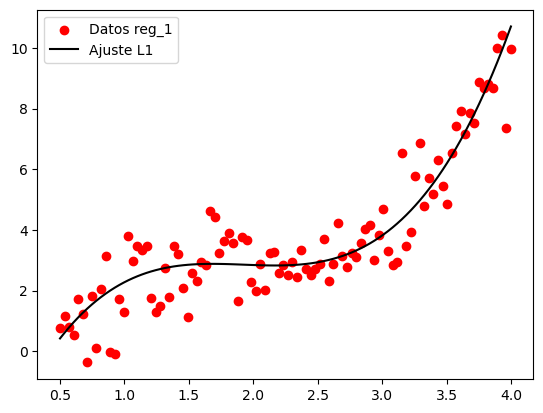

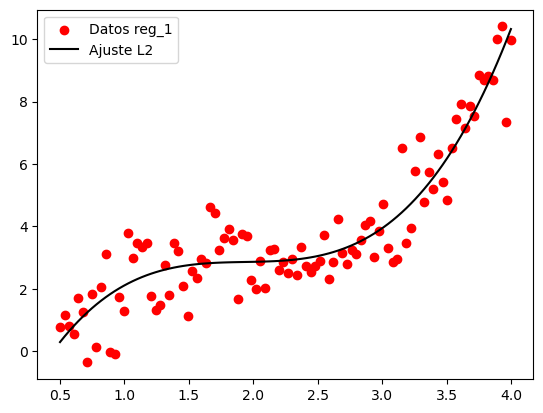

In [33]:
import matplotlib.pyplot as plt

# Gráfica del ajuste L1 (mínimos absolutos)
plt.scatter(x1, y1, color="r", label="Datos reg_1")      # Datos originales
plt.plot(x1, f(x1, beta1_L1), color="k", label="Ajuste L1")  # Curva ajustada con L1
plt.legend()
plt.show()

# Gráfica del ajuste L2 (mínimos cuadrados)
plt.scatter(x1, y1, color="r", label="Datos reg_1")      # Datos originales
plt.plot(x1, f(x1, beta1_L2), color="k", label="Ajuste L2")  # Curva ajustada con L2
plt.legend()
plt.show()


5. Repita los ejercicios 1 al 4 utilizando ahora los datos contenidos en el archivo *reg_2.mat*.

In [34]:
datos2 = loadmat('reg_2.mat')

x2 = datos2["x"][0]
y2 = datos2["y"][0]

beta2_L2 = beta_sol(y2, H_matrix(x2,3))

beta2_L2

array([-4.82897628,  9.53734182, -3.25087435,  0.42829225])

In [35]:
beta2_L1 = sc.optimize.minimize(L1,b_init,args=(x2,y2)).x
beta2_L1

array([-5.35955297, 12.73226199, -6.21667312,  1.00933225])

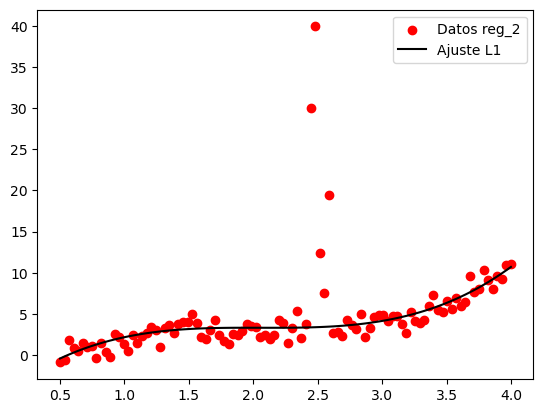

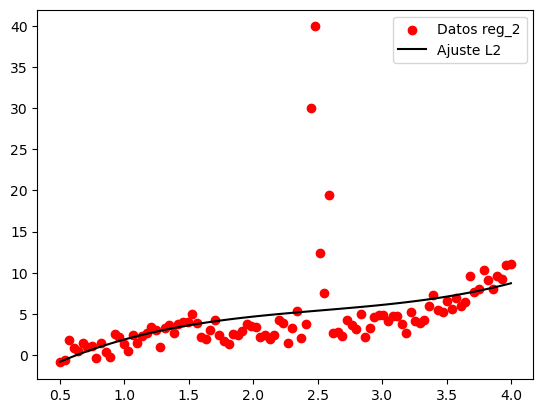

In [36]:
# Gráfica del ajuste L1 para el segundo conjunto de datos
plt.scatter(x2, y2, color="r", label="Datos reg_2")       # Datos originales
plt.plot(x2, f(x2, beta2_L1), color="k", label="Ajuste L1")  # Ajuste con mínimos absolutos
plt.legend()
plt.show()

# Gráfica del ajuste L2 para el segundo conjunto de datos
plt.scatter(x2, y2, color="r", label="Datos reg_2")       # Datos originales
plt.plot(x2, f(x2, beta2_L2), color="k", label="Ajuste L2")  # Ajuste con mínimos cuadrados
plt.legend()
plt.show()


6. Compare el ajuste entre las regresiones que minimizan la norma $L1$ y la norma $L2$ para los dos conjuntos de datos. ¿Qué ocurre con el ajuste cuando hay *outliers*$^1$ o anomalías entre los datos? ¿Cúal de las dos funciones de pérdida responde mejor a la presencia de este tipo de datos? Refiérase al efecto de penalización que ocurre en cada caso.

 > 2. *En términos simples, un outlier es una medición extremadamente alta o baja en relación con el conjunto de datos con los que se está trabajando. Un dato atípico.*

Las regresiones que minimizan las normas L_1 y L_2 se comportan de forma distinta frente a los outliers. Cuando no hay anomalías (como en el conjunto reg_1), ambas regresiones producen un ajuste similar, representando bien la tendencia general. Sin embargo, en presencia de outliers (como en reg_2), la regresión L_2 se ve más afectada porque penaliza fuertemente los errores grandes al elevarlos al cuadrado. En cambio, la regresión L_1 , al penalr de forma lineal, es más robusta y se ajusta mejor a la mayoría de los datos, ignorando en parte los valores atípicos. Por tanto, la norma L_1 responde mejor ante outliers.

**Referencias**

[1]. Géron, Aurelien. *Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow*. Second Edition, 2019. Chapter 4 (Training Models). Page 116.